In [1]:
import sys
# Appending python modules so we can run simulations
sys.path.append("../python")
import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# import stimuli_generation
import os
from utility import load_scene
from pymunk.vec2d import Vec2d
import numpy as np
import json
import pandas as pd
# import matplotlib.pyplot as plt
import numpy as np
# import seaborn as sns
# from math import isnan
# from statsmodels.graphics.gofplots import qqplot
# from statsmodels.formula.api import ols
from itertools import chain
# from matplotlib.pyplot import figure
# from statannot import add_stat_annotation
# from scipy.stats import levene
# import utility
# import models
# import ruptures as rpt
# import pwlf
# from GPyOpt.methods import BayesianOptimization


pygame 2.1.2 (SDL 2.0.18, Python 3.10.2)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
def get_scene_name(file_name):
    '''
    Returns scene name from file name
    '''
    return file_name.split(".")[0]

def get_scene_type(scene_name):
    '''
    Returns the scene type for a given scene name.
    '''
    split_name = scene_name.split('_')[:2]
    return '_'.join(split_name)

# Experiment 1

In [ ]:
# Experiment 1
data_path_exp1 = "../experiments/experiment3/data/cleaned_data.json"

In [4]:
data_exp1 = pd.read_json(data_path_exp1)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

low v.s. med: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.939e-34 U_stat=1.701e+05
med v.s. high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.066e-07 U_stat=2.184e+05
low v.s. high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.719e-69 U_stat=1.233e+05


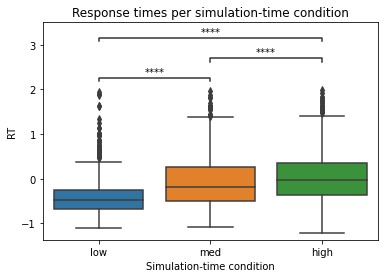

In [15]:
df = data_exp1
x = "sim_time"
y = "zrt"
order = ['low','med','high']
ax = sns.boxplot(data=df, x=x, y=y, order=order)
test_results = add_stat_annotation(ax, 
                                   data=df, 
                                   x=x, 
                                   y=y, 
                                   order=order,
                                   box_pairs=[("low", "med"), 
                                              ("med", "high"), 
                                              ("low", "high")],
                                   test='Mann-Whitney', 
                                   text_format='star',
                                   loc='inside', 
                                   verbose=2)
plt.title("Response times per simulation-time condition")
plt.ylabel("RT")
plt.xlabel("Simulation-time condition")
test_results;

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

yessp v.s. nosp: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.438e-59 U_stat=3.571e+05


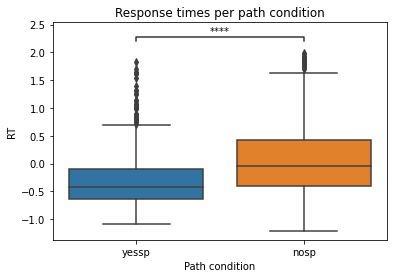

In [14]:
df = data_exp1
x = "straight_path"
y = "zrt"
order = ['yessp','nosp']
ax = sns.boxplot(data=df, x=x, y=y, order=order)
test_results = add_stat_annotation(ax, data=df, x=x, y=y, order=order,
                                   box_pairs=[("yessp", "nosp")],
                                   test='Mann-Whitney', text_format='star',
                                   loc='inside', verbose=2)
plt.title("Response times per path condition")
plt.ylabel("RT")
plt.xlabel("Path condition")
test_results;

In [35]:
# Simulation Values
sim_vals = pd.read_json("../data/model/pilot3/simulation_vals.json")#,converters=conv)
sim_vals = sim_vals.rename(columns={'name':'scene'})
sim_vals = sim_vals[['scene','ticks']]
sim_vals['tick_mean'] = sim_vals.ticks.apply(lambda x: np.mean(x))
sim_vals['tick_std'] = sim_vals.ticks.apply(lambda x: np.std(x))
clean_responses = data_exp1.merge(sim_vals, on='scene')

In [37]:
df = clean_responses.groupby('scene').rt.apply(np.mean)
clean_responses['avg_rt'] = np.nan
for avg_rt,scene in zip(df,df.index):
    clean_responses.loc[clean_responses['scene']==scene,'avg_rt'] = avg_rt

In [42]:
clean_responses['rt_z'] = clean_responses.avg_rt.transform(lambda x: (x-x.mean())/x.std())

In [43]:
clean_responses['sim_time_z'] = clean_responses.tick_mean.transform(lambda x: (x-x.mean())/x.std())

<Figure size 5400x5400 with 0 Axes>

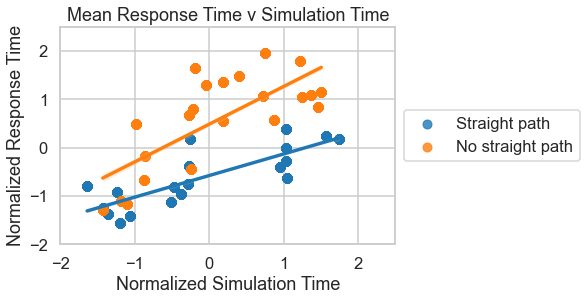

In [139]:
figure(figsize=(18, 18), dpi=300);
fig, ax = plt.subplots()
sns.set_context("talk")
sns.regplot(x='sim_time_z',y='rt_z', data=clean_responses[clean_responses.straight_path == 'yessp'], label="Straight path",ax=ax)
sns.regplot(x='sim_time_z',y='rt_z', data=clean_responses[clean_responses.straight_path == 'nosp'],label="No straight path", ax=ax)
ax.set_xlim(-2, 2.5)
ax.set_ylim(-2, 2.5)
ax.set(xlabel='Normalized Simulation Time', ylabel='Normalized Response Time')
ax.legend(loc='center left', 
           bbox_to_anchor=(1, 0.5))
ax.set_title("Mean Response Time v Simulation Time")

plt.show()

In [137]:
sim_time_z = np.linspace(-1,2,50)
# sim_time_z *= 20
sim_time_z = map(lambda x: x*np.random.normal(1,0.1), sim_time_z)
rt_z = np.linspace(-1,2,50)
# rt_z *= 20
rt_z = map(lambda x: x*np.random.normal(1,0.1), rt_z)
df1 = {"sim_time_z":sim_time_z,'rt_z':rt_z}
df1 = pd.DataFrame.from_dict(df1)

sim_time_z = np.linspace(-1,2,50)
# sim_time_z *= 20
sim_time_z = map(lambda x: x*np.random.normal(1,0.1), sim_time_z)
rt_z = np.linspace(-1,2,50)
# rt_z *= 20
rt_z = list(map(lambda x: x*np.random.normal(1,0.1), rt_z))
df2 = {"sim_time_z":sim_time_z,'rt_z':rt_z}
df2 = pd.DataFrame.from_dict(df2)

<Figure size 5400x5400 with 0 Axes>

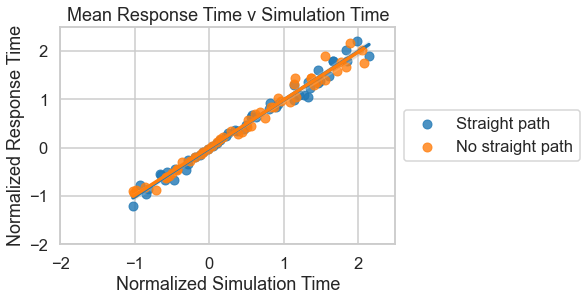

In [138]:
figure(figsize=(18, 18), dpi=300);
fig, ax = plt.subplots()
sns.set_context("talk")
sns.regplot(x='sim_time_z',y='rt_z', data=df1, label="Straight path",ax=ax)
sns.regplot(x='sim_time_z',y='rt_z', data=df2,label="No straight path", ax=ax)
ax.set_xlim(-2, 2.5)
ax.set_ylim(-2, 2.5)
ax.set(xlabel='Normalized Simulation Time', ylabel='Normalized Response Time')
ax.legend(loc='center left', 
           bbox_to_anchor=(1, 0.5))
ax.set_title("Mean Response Time v Simulation Time")

plt.show()

In [131]:
sim_time_z = np.linspace(-1,2,50)
# sim_time_z *= 20
sim_time_z = map(lambda x: x*np.random.normal(1,0.1), sim_time_z)
rt_z = [0.1]*50
# rt_z *= 20
rt_z = map(lambda x: x*np.random.normal(1,0.1), rt_z)
df1 = {"sim_time_z":sim_time_z,'rt_z':rt_z}
df1 = pd.DataFrame.from_dict(df1)

sim_time_z = np.linspace(-1,2,50)
# sim_time_z *= 20
sim_time_z = map(lambda x: x*np.random.normal(1,0.1), sim_time_z)
rt_z = [0.1]*50
# rt_z *= 20
rt_z = list(map(lambda x: x*np.random.normal(1,0.1), rt_z))
df2 = {"sim_time_z":sim_time_z,'rt_z':rt_z}
df2 = pd.DataFrame.from_dict(df2)

<Figure size 5400x5400 with 0 Axes>

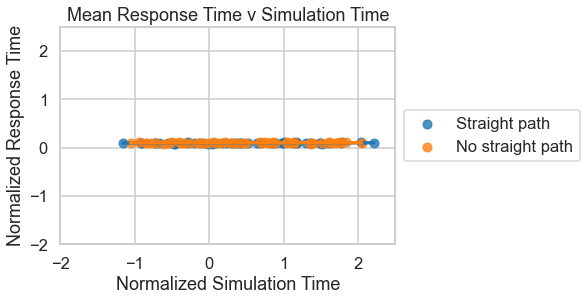

In [132]:
figure(figsize=(18, 18), dpi=300);
fig, ax = plt.subplots()
sns.set_context("talk")
sns.regplot(x='sim_time_z',y='rt_z', data=df1, label="Straight path",ax=ax)
sns.regplot(x='sim_time_z',y='rt_z', data=df2,label="No straight path", ax=ax)
ax.set_xlim(-2, 2.5)
ax.set_ylim(-2, 2.5)
ax.set(xlabel='Normalized Simulation Time', ylabel='Normalized Response Time')
ax.legend(loc='center left', 
           bbox_to_anchor=(1, 0.5))
ax.set_title("Mean Response Time v Simulation Time")

plt.show()

In [133]:
sim_time_z = np.linspace(-1,2,50)
sim_time_z = map(lambda x: x*np.random.normal(1,0.1), sim_time_z)
rt_z = [0.1]*50
rt_z = map(lambda x: x*np.random.normal(1,0.1), rt_z)
df1 = {"sim_time_z":sim_time_z,'rt_z':rt_z}
df1 = pd.DataFrame.from_dict(df1)

sim_time_z = np.linspace(-1,2,50)
sim_time_z = list(map(lambda x: x*np.random.normal(1,0.1), sim_time_z))
rt_z = [x * np.random.normal(1,0.1) for x in sim_time_z]
# rt_z = list(map(lambda x: x*np.random.normal(1,0.1), rt_z))
df2 = {"sim_time_z":sim_time_z,'rt_z':rt_z}
df2 = pd.DataFrame.from_dict(df2)

<Figure size 5400x5400 with 0 Axes>

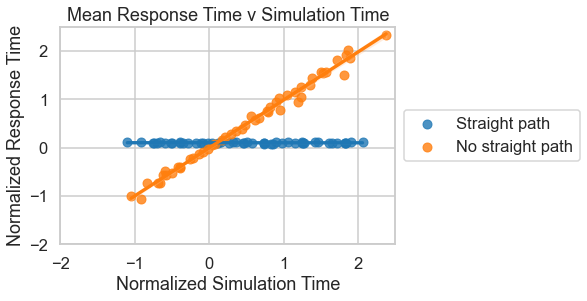

In [134]:
figure(figsize=(18, 18), dpi=300);
fig, ax = plt.subplots()
sns.set_context("talk")
sns.regplot(x='sim_time_z',y='rt_z', data=df1, label="Straight path",ax=ax)
sns.regplot(x='sim_time_z',y='rt_z', data=df2,label="No straight path", ax=ax)
ax.set_xlim(-2, 2.5)
ax.set_ylim(-2, 2.5)
ax.set(xlabel='Normalized Simulation Time', ylabel='Normalized Response Time')
ax.legend(loc='center left', 
           bbox_to_anchor=(1, 0.5))
ax.set_title("Mean Response Time v Simulation Time")

plt.show()

<Figure size 5400x5400 with 0 Axes>

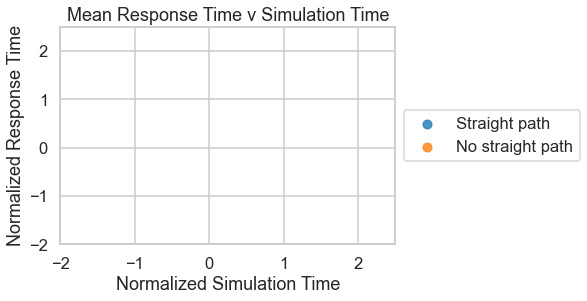

In [136]:
figure(figsize=(18, 18), dpi=300);
fig, ax = plt.subplots()
sns.set_context("talk")
sns.regplot(x=[],y=[], data=df1, label="Straight path",ax=ax)
sns.regplot(x=[],y=[], data=df2,label="No straight path", ax=ax)
ax.set_xlim(-2, 2.5)
ax.set_ylim(-2, 2.5)
ax.set(xlabel='Normalized Simulation Time', ylabel='Normalized Response Time')
ax.legend(loc='center left', 
           bbox_to_anchor=(1, 0.5))
ax.set_title("Mean Response Time v Simulation Time")

plt.show()

In [128]:
# Model Values
split = pd.DataFrame()
models = pd.read_json("../data/model/pilot3/models.json")
for m in ['abstraction']:
    split = pd.concat([split, pd.DataFrame(models[m].tolist(),columns=[f'{m}_collision_prob',
                                                                       f'{m}_samples',
                                                                       f'{m}_ticks'])],axis=1)
models = pd.concat([models['name'], split],axis=1)
models = models.rename(columns={'name':'scene'});

# Compute stats over ticks
for m in ['abstraction']:
    models[f'{m}_tick_mean'] = models[f'{m}_ticks'].apply(np.mean)
    
clean_responses = clean_responses.merge(models, on='scene')

formula = 'rt ~ abstraction_tick_mean'

# Ordinary linear models based on path condition
model_sp = ols(formula, clean_responses[clean_responses.straight_path == 'yessp']).fit()
model_nosp = ols(formula, clean_responses[clean_responses.straight_path == 'nosp']).fit()

[[Text(0.0, 0, ''),
  Text(200.0, 0, ''),
  Text(400.0, 0, ''),
  Text(600.0, 0, ''),
  Text(800.0, 0, ''),
  Text(1000.0, 0, '')]]

<Figure size 2400x1800 with 0 Axes>

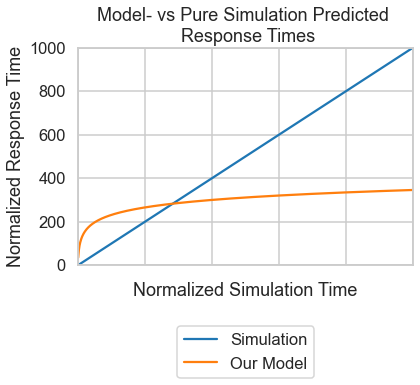

In [69]:
import math
data = {
    "Time":[x for x in range(1000)]+[math.log(x+1)*50 for x in range(1,1001)],
    "Distance":[x for x in range(1000)]+[x for x in range(1000)],
    "Model":["Simulation"]*1000+["Our Model"]*1000}
df = pd.DataFrame.from_dict(data)

sns.set_context("talk")
figure(figsize=(8, 6), dpi=300);
fig, ax = plt.subplots()
sns.set_style("whitegrid")
sns.set_palette("tab10")
g = sns.lineplot(data=df,x="Distance",y="Time",hue="Model",ax=ax)
ax.set_xlim(0, 1000)
ax.set_ylim(0, 1000)
ax.set(xlabel='Normalized Simulation Time', ylabel='Normalized Response Time')
ax.legend(loc='center', 
           bbox_to_anchor=(0.5, -0.4))
ax.set_title("Model- vs Pure Simulation Predicted \n Response Times")
g.set(xticklabels=[])

# Experiment 2

In [3]:
data_path_exp2 = "./cleaned_data_exp_7.json"

In [4]:
data_exp2 = pd.read_json(data_path_exp2)

In [5]:
loaddir = "../data/json/pilot7/trial/"
json_files = [pos_json for pos_json in os.listdir(loaddir) if pos_json.endswith('.json')]

In [6]:
# Dictionary that will contain distance travelled per scenario 
distances = []

# Iterate through stimuli files
for scene_json in json_files:
    scene_dir = loaddir+scene_json
    scene_name = get_scene_name(scene_json)
    scene = load_scene(scene_dir)
    # Extract the origin (the ball's starting position)
    origin = scene.args['ball_args'][0]
    # Extract the goal position
    goal = scene.args['goal_args'][0]
    # Convert these points into Vec2d for compatibility with pymunk
    origin = Vec2d(*origin)
    goal = Vec2d(*goal)
    dist = {}
    # Compute the distance
    dist['distance'] = origin.get_distance(goal)
    # Add the scene, distance pair into the dataframe
    dist['scene'] = scene_name
    distances.append(dist)

In [7]:
distances = pd.DataFrame.from_dict(distances)

In [40]:
simulation_rt = []
abstraction_rt = []
import time
for scene_json in json_files:
    start = time.time()
    scene_dir = loaddir+scene_json
    scene_name = get_scene_name(scene_json)
    print(f"Now on {scene_name}")
    if 'negative' in scene_name:
        collision = False
    else:
        collision = True
    scene_type = get_scene_type(scene_name)
    # Samples to draw from models
    samples = 1000
    # Noise (SD on ball starting pos) for simulation model
    noise = 0.02
    # Generate a scene
    scene = utility.load_scene(scene_dir)
    # Get RT profile from model
    ## Simulation
    print(f"Simulating...")
    simulation_sample = models.simulation(scene.args,num_samples=samples,noise=noise)
    simulation_sample['scene'] = scene_name
    simulation_sample['scene_type'] = scene_type
    simulation_sample['collision'] = collision
    simulation_rt.append(simulation_sample)
    ## Abstraction
    print(f"Abstracting...")
    abstraction_sample = models.abstraction(scene_args=scene.args,N=35,D=200,E=0.99,num_samples=1)
    abstraction_sample['scene'] = scene_name
    abstraction_sample['scene_type'] = scene_type
    abstraction_sample['collision'] = collision
    abstraction_rt.append(abstraction_sample)
    end = time.time()
    print(f"Took {end-start}")

Now on stim_2_goalpos_1_negative
Simulating...
Abstracting...
Took 0.9429497718811035
Now on stim_4_goalpos_4_negative
Simulating...
Abstracting...
Took 0.9220829010009766
Now on stim_6_goalpos_13_negative
Simulating...
Abstracting...
Took 0.7086181640625
Now on stim_4_goalpos_11_negative
Simulating...
Abstracting...
Took 1.0845460891723633
Now on stim_6_goalpos_2
Simulating...
Abstracting...
Took 0.5793471336364746
Now on stim_2_goalpos_13
Simulating...
Abstracting...
Took 0.8999297618865967
Now on stim_4_goalpos_0_negative
Simulating...
Abstracting...
Took 0.9485080242156982
Now on stim_2_goalpos_4
Simulating...
Abstracting...
Took 0.6062211990356445
Now on stim_2_goalpos_5_negative
Simulating...
Abstracting...
Took 1.0352001190185547
Now on stim_4_goalpos_9
Simulating...
Abstracting...
Took 0.8151640892028809
Now on stim_2_goalpos_13_negative
Simulating...
Abstracting...
Took 0.9284689426422119
Now on stim_6_goalpos_6_negative
Simulating...
Abstracting...
Took 0.7084758281707764
Now

In [41]:
simulation_predictions = pd.DataFrame.from_dict(simulation_rt,orient='columns')
simulation_predictions['model'] = 'simulation'
abstraction_predictions = pd.DataFrame.from_dict(abstraction_rt,orient='columns')
abstraction_predictions['model'] = 'abstraction'

In [42]:
predictions = pd.concat([abstraction_predictions,simulation_predictions])

In [43]:
predictions = predictions.merge(distances, on ='scene')

In [44]:
predictions = predictions.explode('simulation_time')

In [45]:
predictions['sim_time_z'] = predictions.groupby('model').simulation_time.transform(lambda x: (x-x.mean())/x.std())

In [46]:
# Resetting the index
predictions = predictions.reset_index(drop=True)

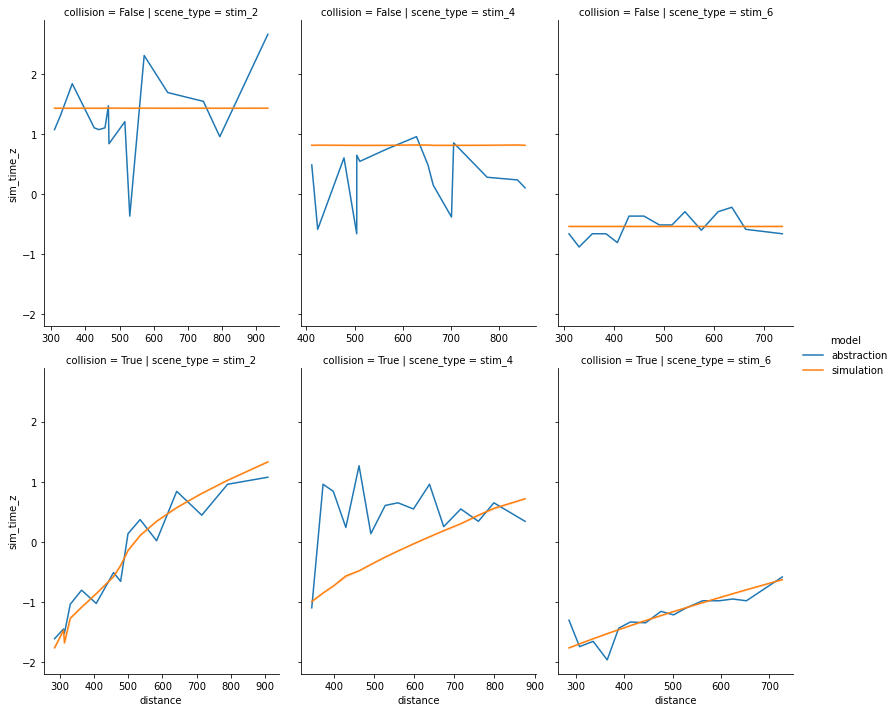

In [47]:
sns.relplot(
    data=predictions,
    x="distance", y="sim_time_z",
    hue="model",
    row="collision",
    col="scene_type",
    kind="line",
#     col_wrap=4,
    height=5, aspect=.75, facet_kws=dict(sharex=False),
)

In [24]:
empirical_data = pd.read_json('cleaned_data_exp_7.json')

In [25]:
empirical_data['model'] = 'empirical'

In [22]:
empirical_data = empirical_data.loc[empirical_data.experiment_version == 7]

In [27]:
empirical_data = empirical_data[['scene','scene_type','scene_col','part_zrt','model']]

In [28]:
empirical_data = empirical_data.rename(columns={'scene_col':'collision','part_zrt':'sim_time_z'})

In [13]:
empirical_data.collision = empirical_data.collision.apply(lambda x: False if x == 'no' else True)

In [14]:
empirical_data = empirical_data.reset_index(drop=True)

In [16]:
empirical_data = empirical_data.merge(distances, on ='scene')

In [26]:
empirical_data

,trial_index,subject_id,condition,rt,response,correct_response,correct,task_condition,scene,scene_type,scene_index,scene_col,timed_out,experiment_version,var_zrt,part_zrt,model
63,63,61766d2d130a7cd172271e11,f,926,j,j,True,no,stim_6_goalpos_9_negative,stim_6,9,no,False,3,-0.074262,0.790945,empirical
68,68,61766d2d130a7cd172271e11,f,672,f,f,True,yes,stim_2_goalpos_12,stim_2,12,yes,False,3,-0.271647,-0.789010,empirical
73,73,61766d2d130a7cd172271e11,f,669,j,j,True,no,stim_6_goalpos_1_negative,stim_6,1,no,False,3,-0.273978,-0.807671,empirical
78,78,61766d2d130a7cd172271e11,f,888,f,j,False,no,stim_4_goalpos_11_negative,stim_4,11,no,False,3,-0.103792,0.554574,empirical
83,83,61766d2d130a7cd172271e11,f,928,f,f,True,yes,stim_2_goalpos_2,stim_2,2,yes,False,3,-0.072707,0.803386,empirical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42076,483,5f9836e2c3a3c80b6c819087,j,752,j,j,True,yes,stim_6_goalpos_3,stim_6,3,yes,False,3,-0.209478,-0.423709,empirical
42081,488,5f9836e2c3a3c80b6c819087,j,1130,f,f,True,no,stim_2_goalpos_2_negative,stim_2,2,no,False,3,0.084268,0.963508,empirical
42086,493,5f9836e2c3a3c80b6c819087,j,1020,f,j,False,yes,stim_2_goalpos_12,stim_2,12,yes,False,3,-0.001213,0.559821,empirical
42091,498,5f9836e2c3a3c80b6c819087,j,790,f,f,True,no,stim_6_goalpos_14_negative,stim_6,14,no,False,3,-0.179948,-0.284253,empirical


In [15]:
predictions = predictions[['scene','scene_type','collision','model','sim_time_z']]

NameError: name 'predictions' is not defined

In [25]:
df = pd.concat([predictions,empirical_data])

In [35]:
# df = df.merge(distances, on ='scene')
df = empirical_data

In [33]:
g = sns.relplot(
    data=df,
    x="distance", y="sim_time_z",
    hue="model", 
    col="scene_type", row="collision",
    kind="line",
    height=5, aspect=.75, facet_kws=dict(sharex=False),
)

g.figure.savefig("output.pdf")

NameError: name 'df' is not defined

# Experiment 3

In [3]:
data_path_exp3 = "../experiments/experiment8/data/data.csv"

In [6]:
data_exp3 = pd.read_csv(data_path_exp3)

In [7]:
data_exp3['experiment_version'] = 4

In [8]:
data_exp3.groupby('experiment_version').subject_id.describe()
data = data_exp3

In [9]:
# Removing unused columns from jsPsych
data = data.drop(columns=['success', 
                          'failed_images',
                          'failed_audio',
                          'failed_video',
                         'time_elapsed',
                         'scene_sp',
                         'internal_node_id',
                         'session_id',
                         'study_id',
                         'value',
                         'stimulus',
                         'timeout',
                         'trial_type'])

In [10]:
# List of subjects who failed comprehension check
failed_comprehension = []
# Iterate through all subjects
for subject in pd.unique(data.subject_id):
    # Find the number of attempts they made
    attempts = data.loc[(data.subject_id == subject) & (data.task == 'comprehension')].attempts.to_list()
    if max(attempts) > 3:
        failed_comprehension.append(subject)
print(f"{len(failed_comprehension)} of {len(pd.unique(data.subject_id))} ({len(failed_comprehension)/len(pd.unique(data.subject_id))*100:.4}%) participants failed the comprehension check")

100 of 169 (59.17%) participants failed the comprehension check


In [9]:
# Remove people who failed comprehension check
data = data.loc[~(data.subject_id.isin(failed_comprehension))]

In [10]:
# Check that none of the remaining subjects also failed the comprehension check
l = pd.unique(data.subject_id)
all([x in failed_comprehension for x in l])

False

In [11]:
# Copy dataframe
responses = data
# Remove attempts column since we no longer are using it
responses = responses.drop(columns=['attempts'])
# Convert all scene type entries to strings
responses.scene_type = responses.scene_type.astype(str)
# Retain only the scene type (remove "_goalpos_" substring)
responses.scene_type = responses.scene_type.apply(lambda x: "_".join(x.split('_')[:2]))
# Convert all scene entries to strings
responses.scene = responses.scene.astype(str)
# Retain only the scene name (remove ".mp4" substring)
responses.scene = responses.scene.apply(lambda x: x.split('.')[0])
# Remove all tasks that aren't coded as response
responses = responses.loc[(responses.task == 'response')]
# Remove the task column since we no longer are using it
responses = responses.drop(columns=['task'])
# Calculate variable-wise z-scores for response time
responses['var_zrt'] = responses.groupby('experiment_version').rt.apply(lambda x: (x-x.mean()) / x.std())
# Calculate participant-wise z-score for response time
responses['part_zrt'] = responses.groupby(['experiment_version','subject_id']).rt.apply(lambda x: (x-x.mean()) / x.std())
# Check these z-scores are not equivalent
all(responses['var_zrt'] == responses['part_zrt'])
# sns.scatterplot(x="var_zrt",y="part_zrt", data=responses) # Should be a straight line if they're the same
# Determine number of datapoints lost by outlier exclusion
excluded = len(responses) - len(responses[abs(responses.part_zrt) <= 2])
print(f"{excluded} of {len(responses)} ({excluded/len(responses)*100:.4}%) are excluded via 2-SD exclusion")

# Excluding outliers
responses = responses[abs(responses.part_zrt) <= 2]

# Save file locally
responses.to_json("cleaned_data_exp_7.json")

1122 of 30420 (3.688%) are excluded via 2-SD exclusion


In [11]:
responses.to_json('experiment_4_data.json')

In [12]:
loaddir = "../data/json/pilot8/trial/"
json_files = [pos_json for pos_json in os.listdir(loaddir) if pos_json.endswith('.json')]

In [13]:
# Dictionary that will contain distance travelled per scenario 
distances = []

# Iterate through stimuli files
for scene_json in json_files:
    scene_dir = loaddir+scene_json
    scene_name = get_scene_name(scene_json)
    if 'negative' in scene_name:
        collision = False
    else:
        collision = True
    scene = load_scene(scene_dir)
    # Extract the origin (the ball's starting position)
    origin = scene.args['ball_args'][0]
    # Extract the goal position
    goal = scene.args['goal_args'][0]
    # Convert these points into Vec2d for compatibility with pymunk
    origin = Vec2d(*origin)
    goal = Vec2d(*goal)
    dist = {}
    # Compute the distance
    dist['distance'] = origin.get_distance(goal)
    # Add the scene, distance pair into the dataframe
    dist['scene'] = scene_name
    dist['collision'] = collision
    distances.append(dist)
    
distances = pd.DataFrame.from_dict(distances)

In [14]:
distances['distance'] = distances['distance'].apply(int)

In [15]:
responses = responses.merge(distances, on="scene")

In [16]:
responses.to_json('experiment_4_data.json')

In [20]:
responses

,trial_index,subject_id,condition,rt,response,correct_response,correct,task_condition,scene,scene_type,scene_index,scene_col,timed_out,experiment_version,var_zrt,part_zrt,distance,collision
0,63,61766d2d130a7cd172271e11,f,926.0,j,j,True,no,stim_6_goalpos_9_negative,stim_6,9.0,no,False,3,-0.074262,0.790945,787,False
1,348,608930a9d426b23a7b53c710,f,862.0,j,j,True,no,stim_6_goalpos_9_negative,stim_6,9.0,no,False,3,-0.123996,-0.414549,787,False
2,407,5d51c9574dd16200012c05a5,j,847.0,f,f,True,no,stim_6_goalpos_9_negative,stim_6,9.0,no,False,3,-0.135653,-0.466877,787,False
3,168,57f567ddb0aca300010a9a60,f,1095.0,j,j,True,no,stim_6_goalpos_9_negative,stim_6,9.0,no,False,3,0.057070,-0.528153,787,False
4,58,5e31e3a74419561c9cb85728,j,1410.0,f,f,True,no,stim_6_goalpos_9_negative,stim_6,9.0,no,False,3,0.301859,0.936011,787,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3084,133,6176966806de000024ed0ddf,j,755.0,f,f,True,no,stim_2_goalpos_5_negative,stim_2,5.0,no,False,3,-0.207147,-0.296284,596,False
3085,158,5ed590bf481c4512b168946f,j,1451.0,f,f,True,no,stim_2_goalpos_5_negative,stim_2,5.0,no,False,3,0.333720,0.276908,596,False
3086,278,60317fc2c8f6320ecde4bcb3,j,778.0,f,f,True,no,stim_2_goalpos_5_negative,stim_2,5.0,no,False,3,-0.189273,0.045247,596,False
3087,187,5e465ab4c07877130185c306,j,662.0,f,f,True,no,stim_2_goalpos_5_negative,stim_2,5.0,no,False,3,-0.279418,-1.107960,596,False


### Rolling average

In [149]:
dist_rt_df = responses[['rt','scene']]

In [150]:
dist_rt_df = pd.DataFrame(dist_rt_df.groupby('scene').rt.apply(np.mean))

In [251]:
# Dictionary that will contain distance travelled per scenario 
rolling_avg_df = pd.DataFrame()
scene_types = ['stim_2','stim_4','stim_6']

for scene_type in scene_types:
    
    for coll in [True, False]:
        
        empirical_distance_to_rt = {}
        # Iterate through stimuli files
        for scene_json in [x for x in json_files if scene_type in x]:
            if coll and '_negative' in scene_json:
                continue
            elif not coll and '_negative' not in scene_json:
                continue
            scene_dir = loaddir+scene_json # Scene location
            scene_name = get_scene_name(scene_json) # Scene name
            scene = utility.load_scene(scene_dir) # Load the scene
            origin =  Vec2d(*scene.args['ball_args'][0]) # Extract the origin
            goal = Vec2d(*scene.args['goal_args'][0]) # Extract the goal position
            d = int(origin.get_distance(goal)) # Compute the distance
            rt = dist_rt_df.loc[scene_name].rt # Grab empirical rt
            empirical_distance_to_rt[d] = rt # Store
        
        # Rolling average
        min_dist = min(empirical_distance_to_rt.keys())
        max_dist = max(empirical_distance_to_rt.keys())
        print(max_dist)
        min_dist_rt = empirical_distance_to_rt[min_dist]
        window = 5
        for d in range(min_dist, min_dist+window):
            empirical_distance_to_rt[d] = min_dist_rt
            
        for d in range(min_dist, max_dist):
            last_five_distances = list(range(d-5,d))
            for idx in range(len(last_five_distances)):
                if last_five_distances[idx] in empirical_distance_to_rt.keys():
                    last_five_distances[idx] = empirical_distance_to_rt[last_five_distances[idx]]
            if d not in empirical_distance_to_rt.keys():
                empirical_distance_to_rt[d] = np.mean(last_five_distances)

        df = pd.DataFrame.from_dict(empirical_distance_to_rt, orient="index")
        df['scene_type'] = scene_type
        df['collision'] = coll
        df = df.reset_index()
        df = df.rename(columns={0:"rt",'index':'distance'})
        rolling_avg_df = pd.concat([rolling_avg_df,df])

1800
1822
1268
1341
1116
1134


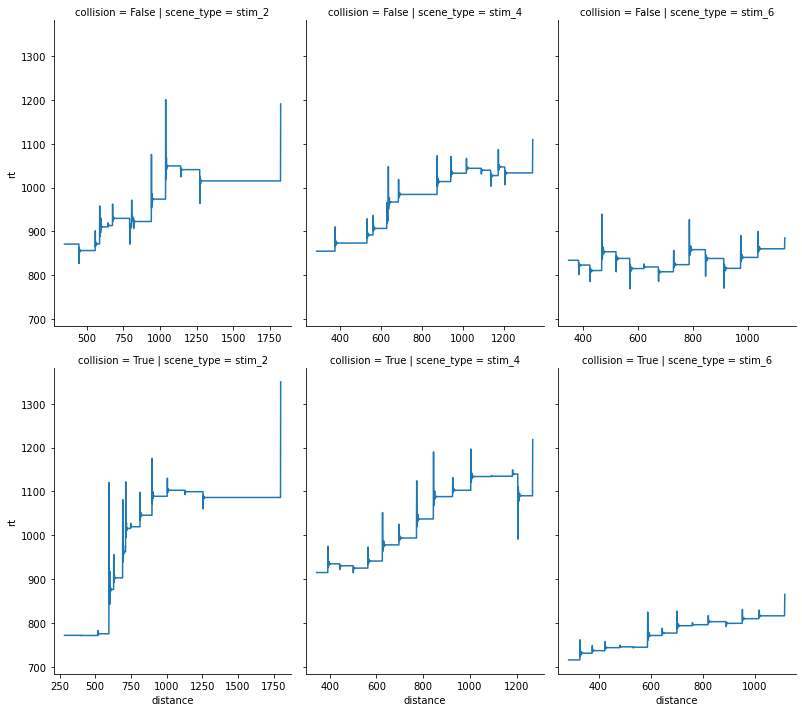

In [252]:
g = sns.relplot(
    data=rolling_avg_df,
    x="distance", y="rt", 
    col="scene_type", row="collision",
    kind="line",
    height=5, aspect=.75, facet_kws=dict(sharex=False),
)

### Changepoint detection

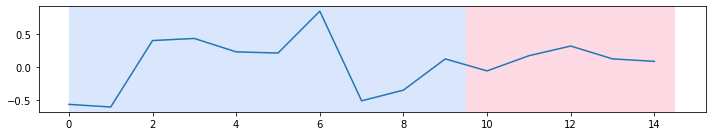

In [287]:
df1 = responses.loc[(responses.scene_type == 'stim_2') & (responses.scene_col=='yes')].groupby('scene').apply(np.mean)
df1 = df1.merge(distances, on='scene')
algo = rpt.Pelt(model="rbf").fit(np.array(df1.part_zrt))
result = algo.predict(pen=1)
rpt.display(np.array(df1.part_zrt), result)
plt.show()

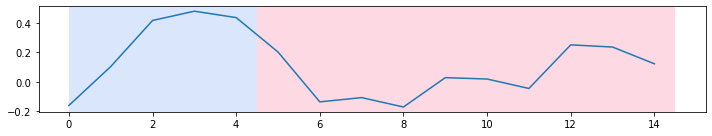

In [288]:
df2 = responses.loc[(responses.scene_type == 'stim_4') & (responses.scene_col=='yes')].groupby('scene').apply(np.mean)
df2 = df2.merge(distances, on='scene')
algo = rpt.Pelt(model="rbf").fit(np.array(df2.part_zrt))
result = algo.predict(pen=1)
rpt.display(np.array(df2.part_zrt), result)
plt.show()

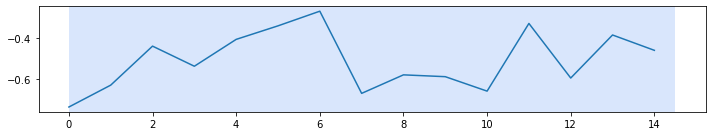

In [289]:
df3 = responses.loc[(responses.scene_type == 'stim_6') & (responses.scene_col=='yes')].groupby('scene').apply(np.mean)
df3 = df3.merge(distances, on='scene')
algo = rpt.Pelt(model="rbf").fit(np.array(df3.part_zrt))
result = algo.predict(pen=1)
rpt.display(np.array(df3.part_zrt), result)
plt.show()

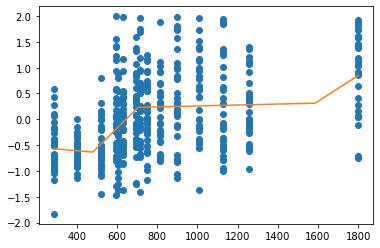

In [281]:
df1 = responses.loc[(responses.scene_type == 'stim_2') & (responses.scene_col=='yes')]
df1 = df1.merge(distances, on='scene')
x = np.array(df1.distance)
y = np.array(df1.part_zrt)

# initialize piecewise linear fit with your x and y data
my_pwlf = pwlf.PiecewiseLinFit(x, y)

# fit the data for four line segments
res = my_pwlf.fit(4)

# predict for the determined points
xHat = np.linspace(min(x), max(x), num=10000)
yHat = my_pwlf.predict(xHat)

# plot the results
plt.figure()
plt.plot(x, y, 'o')
plt.plot(xHat, yHat, '-')
plt.show()

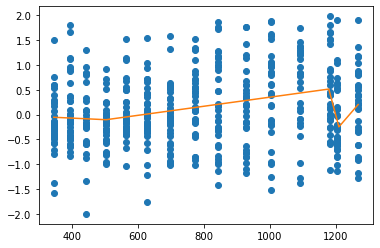

In [282]:
df1 = responses.loc[(responses.scene_type == 'stim_4') & (responses.scene_col=='yes')]
df1 = df1.merge(distances, on='scene')
x = np.array(df1.distance)
y = np.array(df1.part_zrt)
# initialize piecewise linear fit with your x and y data
my_pwlf = pwlf.PiecewiseLinFit(x, y)

# fit the data for four line segments
res = my_pwlf.fit(4)

# predict for the determined points
xHat = np.linspace(min(x), max(x), num=10000)
yHat = my_pwlf.predict(xHat)

# plot the results
plt.figure()
plt.plot(x, y, 'o')
plt.plot(xHat, yHat, '-')
plt.show()

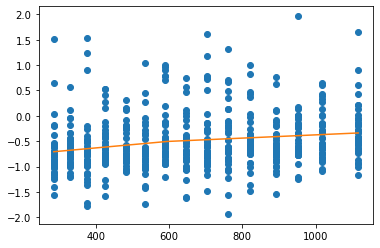

In [278]:
df1 = responses.loc[(responses.scene_type == 'stim_6') & (responses.scene_col=='yes')]
df1 = df1.merge(distances, on='scene')
x = np.array(df1.distance)
y = np.array(df1.part_zrt)

# initialize piecewise linear fit with your x and y data
my_pwlf = pwlf.PiecewiseLinFit(x, y)

# fit the data for four line segments
res = my_pwlf.fit(2)

# predict for the determined points
xHat = np.linspace(min(x), max(x), num=10000)
yHat = my_pwlf.predict(xHat)

# plot the results
plt.figure()
plt.plot(x, y, 'o')
plt.plot(xHat, yHat, '-')
plt.show()

Optimizer initiated
num acquisition: 1, time elapsed: 0.09s
num acquisition: 2, time elapsed: 85.54s

 
 Opt found 

Optimum number of line segments: [9.]
Function value: 224.12598693319663


TypeError: _process_unit_info() got an unexpected keyword argument 'xdata'

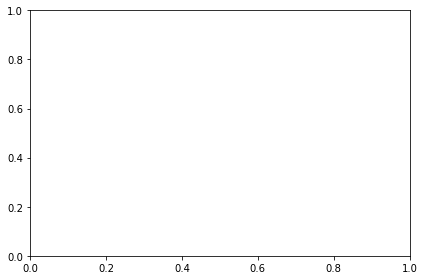

In [294]:
from GPyOpt.methods import BayesianOptimization
df1 = responses.loc[(responses.scene_type == 'stim_2') & (responses.scene_col=='yes')]
df1 = df1.merge(distances, on='scene')
x = np.array(df1.distance)
y = np.array(df1.part_zrt)
# initialize piecewise linear fit with your x and y data
my_pwlf = pwlf.PiecewiseLinFit(x, y)

# define your objective function


def my_obj(x):
    # define some penalty parameter l
    l = y.mean()*0.001
    f = np.zeros(x.shape[0])
    for i, j in enumerate(x):
        my_pwlf.fit(j[0])
        f[i] = my_pwlf.ssr + (l*j[0])
    return f


# define the lower and upper bound for the number of line segments
bounds = [{'name': 'var_1', 'type': 'discrete',
           'domain': np.arange(2, 10)}]

np.random.seed(12121)

myBopt = BayesianOptimization(my_obj, domain=bounds, model_type='GP',
                              initial_design_numdata=10,
                              initial_design_type='latin',
                              exact_feval=True, verbosity=True,
                              verbosity_model=True)
max_iter = 2
print("Optimizer initiated")

# perform the bayesian optimization to find the optimum number
# of line segments
myBopt.run_optimization(max_iter=max_iter, verbosity=True)

print('\n \n Opt found \n')
print('Optimum number of line segments:', myBopt.x_opt)
print('Function value:', myBopt.fx_opt)
myBopt.plot_acquisition()
myBopt.plot_convergence()

# perform the fit for the optimum
my_pwlf.fit(myBopt.x_opt)
# predict for the determined points
xHat = np.linspace(min(x), max(x), num=1000)
yHat = my_pwlf.predict(xHat)

# plot the results
plt.figure()
plt.plot(x, y, 'o')
plt.plot(xHat, yHat, '-')
plt.show()

In [22]:
responses = responses.merge(distances, on ='scene')

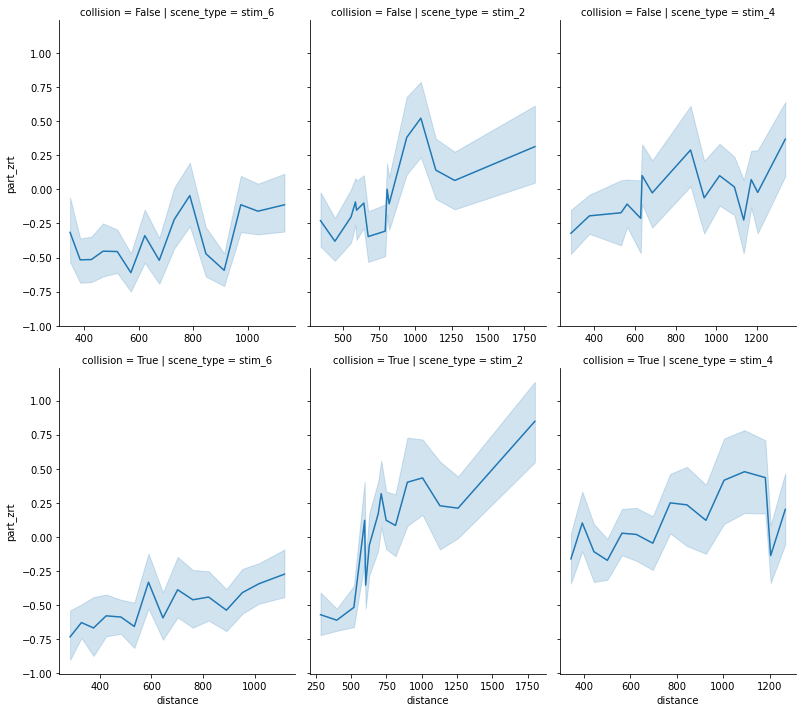

In [23]:
g = sns.relplot(
    data=responses,
    x="distance", y="part_zrt", 
    col="scene_type", row="collision",
    kind="line",
    height=5, aspect=.75, facet_kws=dict(sharex=False),
)

g.figure.savefig("output.pdf")

In [24]:
responses.groupby('scene_type')['distance']

In [111]:
test = responses.set_index('distance')

In [112]:
test.reset_index()

,distance,trial_index,subject_id,condition,rt,response,correct_response,correct,task_condition,scene,scene_type,scene_index,scene_col,timed_out,experiment_version,var_zrt,part_zrt,collision
0,787.655647,63,61766d2d130a7cd172271e11,f,926.0,j,j,True,no,stim_6_goalpos_9_negative,stim_6,9.0,no,False,3,-0.074262,0.790945,False
1,787.655647,348,608930a9d426b23a7b53c710,f,862.0,j,j,True,no,stim_6_goalpos_9_negative,stim_6,9.0,no,False,3,-0.123996,-0.414549,False
2,787.655647,407,5d51c9574dd16200012c05a5,j,847.0,f,f,True,no,stim_6_goalpos_9_negative,stim_6,9.0,no,False,3,-0.135653,-0.466877,False
3,787.655647,168,57f567ddb0aca300010a9a60,f,1095.0,j,j,True,no,stim_6_goalpos_9_negative,stim_6,9.0,no,False,3,0.057070,-0.528153,False
4,787.655647,58,5e31e3a74419561c9cb85728,j,1410.0,f,f,True,no,stim_6_goalpos_9_negative,stim_6,9.0,no,False,3,0.301859,0.936011,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3084,596.680989,133,6176966806de000024ed0ddf,j,755.0,f,f,True,no,stim_2_goalpos_5_negative,stim_2,5.0,no,False,3,-0.207147,-0.296284,False
3085,596.680989,158,5ed590bf481c4512b168946f,j,1451.0,f,f,True,no,stim_2_goalpos_5_negative,stim_2,5.0,no,False,3,0.333720,0.276908,False
3086,596.680989,278,60317fc2c8f6320ecde4bcb3,j,778.0,f,f,True,no,stim_2_goalpos_5_negative,stim_2,5.0,no,False,3,-0.189273,0.045247,False
3087,596.680989,187,5e465ab4c07877130185c306,j,662.0,f,f,True,no,stim_2_goalpos_5_negative,stim_2,5.0,no,False,3,-0.279418,-1.107960,False


In [131]:
subject_dfs = responses.groupby('subject_id')

In [132]:
subject_dfs = [subject_dfs.get_group(x) for x in subject_dfs.groups]

In [134]:
rolling_avg = []
interpolation = []
gp = []
scenes = list(pd.unique(responses.scene_type))
new_index = np.arange(0, max(responses.distance))

# For each scene
for scene in scenes:
    # For each subject
    for subject in subject_dfs:
        # Positive scenes
        pos = group.loc[(subject.collision == True) & (subject.scene_type == scene)]
        # Negative scenes
        neg = group.loc[(subject.collision == False) & (subject.scene_type == scene)]
        # Sort by distance
        pos = pos.sort_values(by="distance")
        neg = neg.sort_values(by="distance")
        # Reset indices
        pos = pos.reset_index(drop=True)
        neg = neg.reset_index(drop=True)
        
        # Rolling average
        pos['rolling_rt'] = pos.rt.rolling(3).mean() 
        neg['rolling_rt'] = neg.rt.rolling(3).mean()
        rolling_df = pd.concat([pos,neg])
        rolling_avg.append(rolling_df)

        # Interpolation
        f1_pos = interp1d(pos.distance, pos['rt'],kind='cubic')
        f1_neg = interp1d(pos.distance, neg['rt'],kind='cubic')
#         new_index = np.arange(0, max(test.distance))
#         pos['smooth_rt'] = f1_pos(new_index)
#         neg['smooth_rt'] = f1_neg(new_index)
#         interp_df = pd.concat([pos,neg])
#         interpolation.append(interp_df)
        
        # Gaussian process

ValueError: x and y arrays must be equal in length along interpolation axis.

Switchpoints should be over multiple participants, not individuals becasue RT is noisy

Non-hierarchical:

N ~ Unif(0,5)

X_n ~ Unif(distance_range)

RT ~ GLM

Hierarchical

N ~ Unif(0,5)

X_bar_n ~ Unif()

sigma ~ Unif()

X_subject_n ~ Unif(X_bar_n, sigma)

RT ~ GLM

Fix model as well

Don't fit the average

Loop within PyMC3 over all of the participants with the same parameters. Don't allow for individual variation.
- Could allow for lightweight variation between participants

Look at the pwlf model parametrs. Try to see if you can put a pwerlaw prior over the changepoints


In [106]:
list(pd.unique(responses.scene_type))

['stim_6', 'stim_2', 'stim_4']

In [55]:
test = pd.concat([x for x in dfs])

In [56]:
test

,trial_index,subject_id,condition,rt,response,correct_response,correct,task_condition,scene,scene_type,scene_index,scene_col,timed_out,experiment_version,var_zrt,part_zrt,distance,collision,rolling_rt
0,248,61766d2d130a7cd172271e11,f,672.0,j,j,True,no,stim_4_goalpos_0_negative,stim_4,0.0,no,False,3,-0.271647,-0.789010,284.343235,False,NaN
1,473,5d6e3252dfe6d10001dbe508,f,899.0,j,j,True,no,stim_4_goalpos_0_negative,stim_4,0.0,no,False,3,-0.095243,0.076381,284.343235,False,NaN
2,467,613ad089983f33fc8194d601,j,905.0,f,f,True,no,stim_4_goalpos_0_negative,stim_4,0.0,no,False,3,-0.090581,-0.170178,284.343235,False,825.333333
3,468,5c58d8472edc490001c80bda,f,643.0,j,j,True,no,stim_4_goalpos_0_negative,stim_4,0.0,no,False,3,-0.294183,-0.581618,284.343235,False,815.666667
4,497,5d79d3f3fa7c0700018f0a14,j,838.0,f,f,True,no,stim_4_goalpos_0_negative,stim_4,0.0,no,False,3,-0.142647,-0.155760,284.343235,False,795.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,222,60f775a088623ed07802823f,f,1490.0,j,j,True,no,stim_2_goalpos_14_negative,stim_2,14.0,no,False,3,0.364027,1.378367,1822.230970,False,1188.333333
26,323,57f567ddb0aca300010a9a60,f,4172.0,f,j,False,no,stim_2_goalpos_14_negative,stim_2,14.0,no,False,3,2.448230,1.892831,1822.230970,False,2186.666667
27,68,608930a9d426b23a7b53c710,f,1157.0,f,j,False,no,stim_2_goalpos_14_negative,stim_2,14.0,no,False,3,0.105250,0.378411,1822.230970,False,2273.000000
28,172,5e465ab4c07877130185c306,j,687.0,f,f,True,no,stim_2_goalpos_14_negative,stim_2,14.0,no,False,3,-0.259990,-0.983477,1822.230970,False,2005.333333


In [64]:
def fx(x):
    if np.isnan(x['rolling_rt']):
        return x['rt']
    else:
        return x['rolling_rt']

test['rolling_rt']=test.apply(lambda x : fx(x),axis=1)

In [37]:
test

,trial_index,subject_id,condition,rt,response,correct_response,correct,task_condition,scene,scene_type,scene_index,scene_col,timed_out,experiment_version,var_zrt,part_zrt,distance,collision,rolling_rt
0,248,61766d2d130a7cd172271e11,f,672.0,j,j,True,no,stim_4_goalpos_0_negative,stim_4,0.0,no,False,3,-0.271647,-0.789010,284.343235,False,672.000000
1,473,5d6e3252dfe6d10001dbe508,f,899.0,j,j,True,no,stim_4_goalpos_0_negative,stim_4,0.0,no,False,3,-0.095243,0.076381,284.343235,False,899.000000
2,467,613ad089983f33fc8194d601,j,905.0,f,f,True,no,stim_4_goalpos_0_negative,stim_4,0.0,no,False,3,-0.090581,-0.170178,284.343235,False,825.333333
3,468,5c58d8472edc490001c80bda,f,643.0,j,j,True,no,stim_4_goalpos_0_negative,stim_4,0.0,no,False,3,-0.294183,-0.581618,284.343235,False,815.666667
4,497,5d79d3f3fa7c0700018f0a14,j,838.0,f,f,True,no,stim_4_goalpos_0_negative,stim_4,0.0,no,False,3,-0.142647,-0.155760,284.343235,False,795.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,222,60f775a088623ed07802823f,f,1490.0,j,j,True,no,stim_2_goalpos_14_negative,stim_2,14.0,no,False,3,0.364027,1.378367,1822.230970,False,1188.333333
26,323,57f567ddb0aca300010a9a60,f,4172.0,f,j,False,no,stim_2_goalpos_14_negative,stim_2,14.0,no,False,3,2.448230,1.892831,1822.230970,False,2186.666667
27,68,608930a9d426b23a7b53c710,f,1157.0,f,j,False,no,stim_2_goalpos_14_negative,stim_2,14.0,no,False,3,0.105250,0.378411,1822.230970,False,2273.000000
28,172,5e465ab4c07877130185c306,j,687.0,f,f,True,no,stim_2_goalpos_14_negative,stim_2,14.0,no,False,3,-0.259990,-0.983477,1822.230970,False,2005.333333


In [58]:
test = test.loc[test.collision == True]

In [59]:
test = test.sort_values(by="distance")

In [60]:
test = test.reset_index(drop=True)

In [61]:
test['rolling_rt'] = test.rt.rolling(7).mean()

In [62]:
test = test.reset_index(drop=True)

In [65]:
test

,trial_index,subject_id,condition,rt,response,correct_response,correct,task_condition,scene,scene_type,scene_index,scene_col,timed_out,experiment_version,var_zrt,part_zrt,distance,collision,rolling_rt
0,208,61766d2d130a7cd172271e11,f,637.0,f,f,True,yes,stim_6_goalpos_0,stim_6,0.0,yes,False,3,-0.298846,-1.006720,285.345404,True,637.000000
1,162,5d51c9574dd16200012c05a5,j,684.0,j,j,True,yes,stim_6_goalpos_0,stim_6,0.0,yes,False,3,-0.262322,-0.921997,285.345404,True,684.000000
2,243,57f567ddb0aca300010a9a60,f,583.0,f,f,True,yes,stim_6_goalpos_0,stim_6,0.0,yes,False,3,-0.340809,-0.930994,285.345404,True,583.000000
3,388,5e31e3a74419561c9cb85728,j,846.0,j,j,True,yes,stim_6_goalpos_0,stim_6,0.0,yes,False,3,-0.136430,-0.556666,285.345404,True,846.000000
4,397,60f775a088623ed07802823f,f,759.0,f,f,True,yes,stim_6_goalpos_0,stim_6,0.0,yes,False,3,-0.204039,-1.144312,285.345404,True,759.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1527,308,60317fc2c8f6320ecde4bcb3,j,783.0,f,j,False,yes,stim_2_goalpos_14,stim_2,14.0,yes,False,3,-0.185388,0.069372,1800.146024,True,1292.857143
1528,173,61766d2d130a7cd172271e11,f,1101.0,j,f,False,yes,stim_2_goalpos_14,stim_2,14.0,yes,False,3,0.061732,1.879497,1800.146024,True,1280.714286
1529,137,5a913be789de8200013ea962,j,804.0,f,j,False,yes,stim_2_goalpos_14,stim_2,14.0,yes,False,3,-0.169069,0.047120,1800.146024,True,1214.285714
1530,177,5e465ab4c07877130185c306,j,741.0,f,j,False,yes,stim_2_goalpos_14,stim_2,14.0,yes,False,3,-0.218026,-0.714592,1800.146024,True,1028.285714


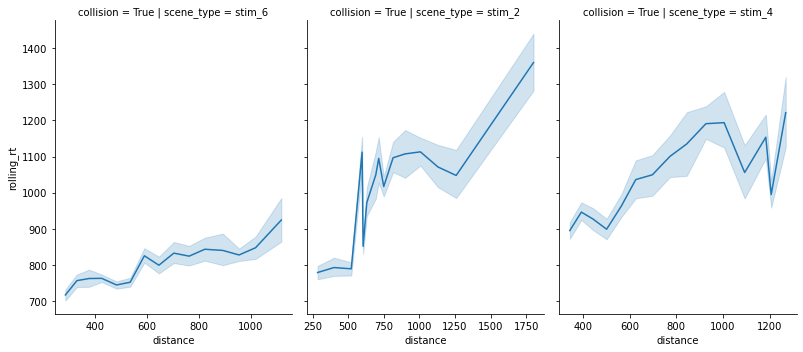

In [66]:
g = sns.relplot(
    data=test,
    x="distance", y="rolling_rt", 
    col="scene_type", row="collision",
    kind="line",
    height=5, aspect=.75, facet_kws=dict(sharex=False),
)

g.figure.savefig("output.pdf")

ValueError: Expect x to not have duplicates

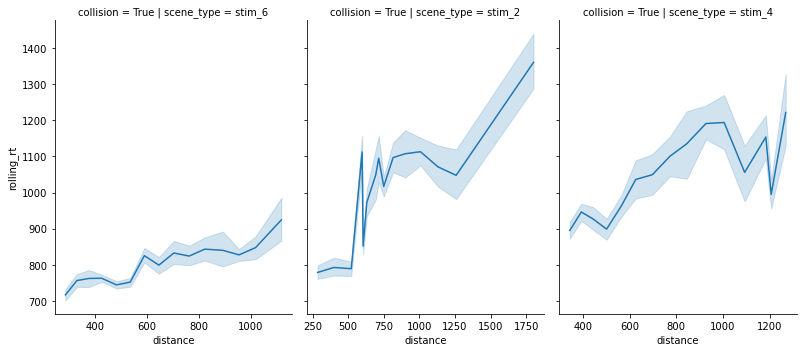

In [67]:
from scipy.interpolate import interp1d
df1 = test

g = sns.relplot(
    data=df1,
    x="distance", y="rolling_rt", 
    col="scene_type", row="collision",
    kind="line",
    height=5, aspect=.75, facet_kws=dict(sharex=False),
)

f1 = interp1d(df1.distance, df1['rt'],kind='cubic')

df2 = df1
new_index = np.arange(0, max(test.distance))
df2['rt'] = f1(new_index)
df2.index = new_index

g = sns.relplot(
    data=df2,
    x="distance", y="rolling_rt", 
    col="scene_type", row="collision",
    kind="line",
    height=5, aspect=.75, facet_kws=dict(sharex=False),
)

In [46]:
max(test.distance)

1800.1460240353142

In [50]:
df1

,trial_index,subject_id,condition,rt,response,correct_response,correct,task_condition,scene,scene_type,scene_index,scene_col,timed_out,experiment_version,var_zrt,part_zrt,distance,collision,rolling_rt
0,208,61766d2d130a7cd172271e11,f,637.0,f,f,True,yes,stim_6_goalpos_0,stim_6,0.0,yes,False,3,-0.298846,-1.006720,285.345404,True,NaN
1,162,5d51c9574dd16200012c05a5,j,684.0,j,j,True,yes,stim_6_goalpos_0,stim_6,0.0,yes,False,3,-0.262322,-0.921997,285.345404,True,NaN
2,243,57f567ddb0aca300010a9a60,f,583.0,f,f,True,yes,stim_6_goalpos_0,stim_6,0.0,yes,False,3,-0.340809,-0.930994,285.345404,True,634.666667
3,388,5e31e3a74419561c9cb85728,j,846.0,j,j,True,yes,stim_6_goalpos_0,stim_6,0.0,yes,False,3,-0.136430,-0.556666,285.345404,True,704.333333
4,397,60f775a088623ed07802823f,f,759.0,f,f,True,yes,stim_6_goalpos_0,stim_6,0.0,yes,False,3,-0.204039,-1.144312,285.345404,True,729.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1527,308,60317fc2c8f6320ecde4bcb3,j,783.0,f,j,False,yes,stim_2_goalpos_14,stim_2,14.0,yes,False,3,-0.185388,0.069372,1800.146024,True,1164.333333
1528,173,61766d2d130a7cd172271e11,f,1101.0,j,f,False,yes,stim_2_goalpos_14,stim_2,14.0,yes,False,3,0.061732,1.879497,1800.146024,True,1248.666667
1529,137,5a913be789de8200013ea962,j,804.0,f,j,False,yes,stim_2_goalpos_14,stim_2,14.0,yes,False,3,-0.169069,0.047120,1800.146024,True,896.000000
1530,177,5e465ab4c07877130185c306,j,741.0,f,j,False,yes,stim_2_goalpos_14,stim_2,14.0,yes,False,3,-0.218026,-0.714592,1800.146024,True,882.000000


In [79]:
import sklearn.gaussian_process as gp
import random
data = [(x,y) for x,y in zip(test.distance, test.rt)]
random.shuffle(data)
train = data[:int(len(data)/2)]
test = data[int(len(data)/2):]

In [96]:
X = [x[0] for x in data]
Y = [x[1] for x in data]

X_tr = np.array([x[0] for x in train]).reshape(-1, 1)
Y_tr = np.array([x[1] for x in train]).reshape(-1, 1)

X_te = np.array([x[0] for x in test]).reshape(-1, 1)
Y_te = np.array([x[1] for x in test]).reshape(-1, 1)

In [82]:
kernel = gp.kernels.ConstantKernel(1.0, (1e-1, 1e3)) * gp.kernels.RBF(10.0, (1e-3, 1e3))

In [91]:
model = gp.GaussianProcessRegressor(n_restarts_optimizer=10, alpha=0.1, normalize_y=True)

In [92]:
model.fit(X_tr, Y_tr)
params = model.kernel_.get_params()

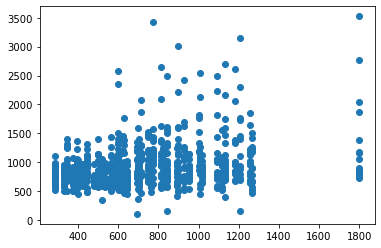

In [102]:
mean_prediction, std_prediction = model.predict(X_te, return_std=True)

# plt.plot(X, Y, linestyle="dotted")
plt.scatter(X_tr, Y_tr, label="Observations")
# plt.plot(X_te, mean_prediction, label="Mean prediction")
# plt.fill_between(
#     X.ravel(),
#     mean_prediction - 1.96 * std_prediction,
#     mean_prediction + 1.96 * std_prediction,
#     alpha=0.5,
#     label=r"95% confidence interval",
# )

In [94]:
y_pred

array([ 746.3517101 ,  753.0757681 ,  991.67458947, 1003.08880238,
        711.37500294, 1157.13416401,  886.27266273, 1018.6001326 ,
        854.10892004,  854.10892004,  842.93129355, 1145.91692749,
        711.37500294,  711.37500294, 1106.60015731, 1018.6001326 ,
        753.0757681 , 1148.67032355,  919.9511611 , 1042.2518673 ,
        971.11937082,  971.11937082, 1157.13416401,  991.67458947,
        844.12334653,  753.0757681 ,  756.6106038 ,  753.0757681 ,
        991.67458947,  749.49018495,  792.2518673 ,  906.35603344,
        971.11937082, 1235.16155162,  971.11937082,  749.49018495,
        906.35603344,  753.0757681 ,  854.10892004,  971.11937082,
        792.2518673 , 1042.2518673 , 1157.13416401, 1106.60015731,
       1256.2141832 ,  753.0757681 , 1003.08880238,  951.79166898,
        711.37500294,  711.37500294,  737.61769197, 1018.6001326 ,
       1120.37387026, 1106.60015731, 1324.72376521,  854.10892004,
        919.43055746,  854.10892004,  906.35603344, 1148.67032